In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
dfk= pd.read_csv(r"C:./Desktop/ALL_2021_IPL_MATCHES_BALL_BY_BALL.csv")
dfk

,match_name,inning,batting_team,bowling_team,ball,non_striker,batsman,bowler,extra_runs,batsman_run,...,player_out,elimination_kind,fielders_caught,umpires_1,umpires_2,player_of_match,winner,city,venue,dates
0,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.1,CA Lynn,RG Sharma,Mohammed Siraj,0,2,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
1,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.2,CA Lynn,RG Sharma,Mohammed Siraj,0,0,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
2,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.3,CA Lynn,RG Sharma,Mohammed Siraj,0,0,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
3,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.4,CA Lynn,RG Sharma,Mohammed Siraj,0,2,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
4,MI vs RCB 2021-04-09,1st innings,Mumbai Indians,Royal Challengers Bangalore,0.5,CA Lynn,RG Sharma,Mohammed Siraj,0,0,...,NaN,NaN,NaN,KN Ananthapadmanabhan,Nitin Menon,HV Patel,Royal Challengers Bangalore,Chennai,"MA Chidambaram Stadium, Chepauk, Chennai",2021-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14408,CSK vs KKR 2021-10-15,2nd innings,Kolkata Knight Riders,Chennai Super Kings,19.2,LH Ferguson,Shivam Mavi,DJ Bravo,0,1,...,NaN,NaN,NaN,Nitin Menon,RK Illingworth,F du Plessis,Chennai Super Kings,Dubai,Dubai International Cricket Stadium,2021-10-15
14409,CSK vs KKR 2021-10-15,2nd innings,Kolkata Knight Riders,Chennai Super Kings,19.3,Shivam Mavi,LH Ferguson,DJ Bravo,0,1,...,NaN,NaN,NaN,Nitin Menon,RK Illingworth,F du Plessis,Chennai Super Kings,Dubai,Dubai International Cricket Stadium,2021-10-15
14410,CSK vs KKR 2021-10-15,2nd innings,Kolkata Knight Riders,Chennai Super Kings,19.4,LH Ferguson,Shivam Mavi,DJ Bravo,0,0,...,NaN,NaN,NaN,Nitin Menon,RK Illingworth,F du Plessis,Chennai Super Kings,Dubai,Dubai International Cricket Stadium,2021-10-15
14411,CSK vs KKR 2021-10-15,2nd innings,Kolkata Knight Riders,Chennai Super Kings,19.5,LH Ferguson,Shivam Mavi,DJ Bravo,0,0,...,Shivam Mavi,caught,DL Chahar,Nitin Menon,RK Illingworth,F du Plessis,Chennai Super Kings,Dubai,Dubai International Cricket Stadium,2021-10-15


<AxesSubplot:xlabel='batting team'>

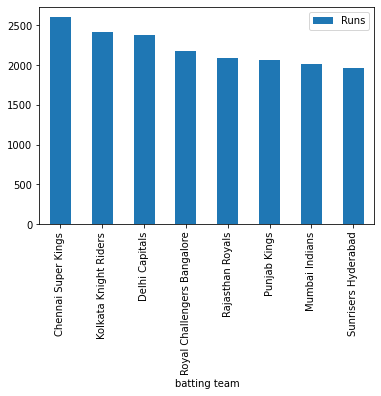

In [5]:
aruns = dfk.groupby(['batting_team'])['batsman_run'].sum().reset_index()
aruns.columns=['batting team','Runs']
y10 = aruns.sort_values(by='Runs',ascending=False ).head(15)
y10
y10.plot.bar(x="batting team")

<AxesSubplot:xlabel='batsman'>

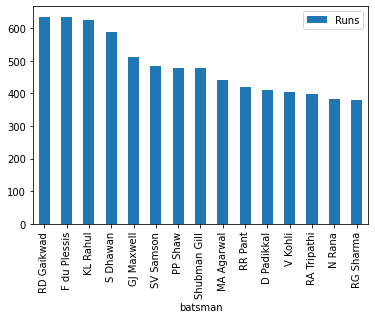

In [6]:
aruns = dfk.groupby(['batsman'])['batsman_run'].sum().reset_index()
aruns.columns=['batsman','Runs']
y10 = aruns.sort_values(by='Runs',ascending=False ).head(15)
y10
y10.plot.bar(x="batsman")

In [10]:
sub_data14 = dfk.loc[:, ['batsman', 'bowler', 'elimination_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['elimination_kind'] == 'bowled') | (sub_data14['elimination_kind'] == 'caught') | (sub_data14['elimination_kind'] == 'caught and bowled') | (sub_data14['elimination_kind'] == 'stumped') | (sub_data14['elimination_kind'] == 'lbw') | (sub_data14['elimination_kind'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().keys().tolist()
wickets = bowler_data['bowler'].value_counts().tolist()

<AxesSubplot:xlabel='Bowlers'>

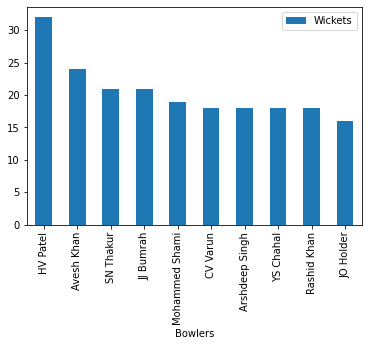

In [12]:
d1 = {'Bowlers':bowler,'Wickets':wickets}
df1 = pd.DataFrame(d1)
df1
dfg=df1.head(10)
dfg.plot.bar(x='Bowlers')

In [13]:
sub_data14 = dfk.loc[:, ['batsman', 'bowling_team', 'elimination_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['elimination_kind'] == 'bowled') | (sub_data14['elimination_kind'] == 'caught') | (sub_data14['elimination_kind'] == 'caught and bowled') | (sub_data14['elimination_kind'] == 'stumped') | (sub_data14['elimination_kind'] == 'lbw') | (sub_data14['elimination_kind'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowling_team']]
bowler = bowler_data['bowling_team'].value_counts().keys().tolist()
wickets = bowler_data['bowling_team'].value_counts().tolist()

<AxesSubplot:xlabel='Bowlers'>

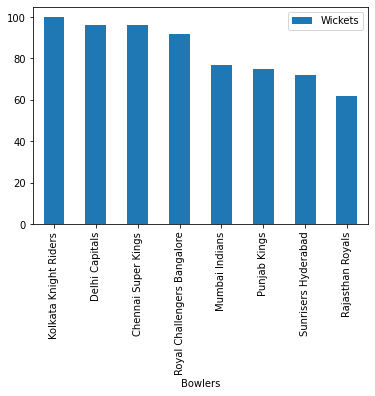

In [16]:
d1 = {'Bowlers':bowler,'Wickets':wickets}
df1 = pd.DataFrame(d1)
df1
dfg=df1.head(10)
dfg.plot.bar(x='Bowlers')

<AxesSubplot:xlabel='Bowling team'>

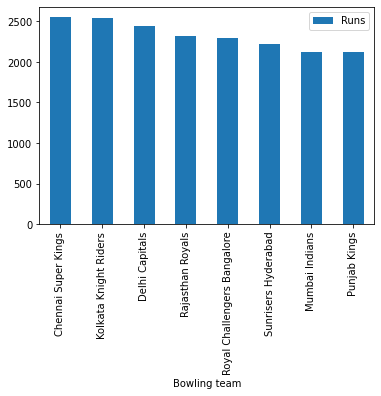

In [18]:
#Most runs concieved
runs1 = dfk.groupby(['bowling_team'])['total_runs'].sum().reset_index()
runs1.columns=['Bowling team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(20)
y#runs against all teams
y.plot.bar(x='Bowling team')

<AxesSubplot:xlabel='Bowling team'>

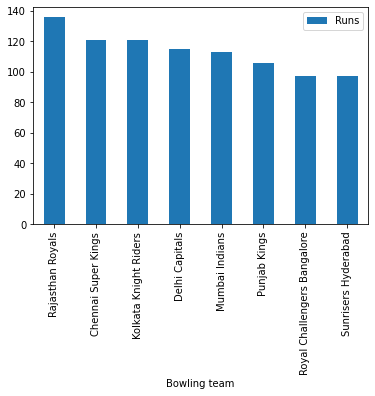

In [20]:
runs1 = dfk.groupby(['bowling_team'])['extra_runs'].sum().reset_index()
runs1.columns=['Bowling team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(20)
y#top extras by all teams
y.plot.bar(x='Bowling team')

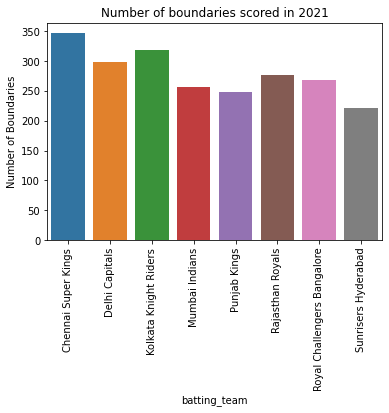

In [21]:
def barplot(x_axis, y_axis, plot_data, title, x_label, y_label):
    """Bar plot using seaborn library"""
    plot = sns.barplot(x=x_axis, y=y_axis, data=plot_data)
    plot.set(xlabel=x_label, ylabel=y_label)
    plot.set_title(title)
    plt.xticks(rotation=90)
    plt.show()
    #number of 4s and 6s scored boundaries scored in each season
boundaries_per_season = dfk[(dfk['batsman_run']==4) | (dfk['batsman_run']==6)].groupby(['batting_team'])['batsman_run'].count().reset_index()
#barplot
barplot('batting_team', 'batsman_run', boundaries_per_season, 'Number of boundaries scored in 2021',
        'batting_team', 'Number of Boundaries')

# As a batting team csk in 2021

In [22]:


cskb=(dfk['batting_team']=='Chennai Super Kings')
df_csk10=dfk[cskb]
df_csk10.head()# matches by csk in 2020 as batting team

,match_name,inning,batting_team,bowling_team,ball,non_striker,batsman,bowler,extra_runs,batsman_run,...,player_out,elimination_kind,fielders_caught,umpires_1,umpires_2,player_of_match,winner,city,venue,dates
250,CSK vs DC 2021-04-10,1st innings,Chennai Super Kings,Delhi Capitals,0.1,F du Plessis,RD Gaikwad,CR Woakes,0,0,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10
251,CSK vs DC 2021-04-10,1st innings,Chennai Super Kings,Delhi Capitals,0.2,F du Plessis,RD Gaikwad,CR Woakes,0,0,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10
252,CSK vs DC 2021-04-10,1st innings,Chennai Super Kings,Delhi Capitals,0.3,F du Plessis,RD Gaikwad,CR Woakes,0,4,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10
253,CSK vs DC 2021-04-10,1st innings,Chennai Super Kings,Delhi Capitals,0.4,F du Plessis,RD Gaikwad,CR Woakes,1,0,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10
254,CSK vs DC 2021-04-10,1st innings,Chennai Super Kings,Delhi Capitals,0.5,RD Gaikwad,F du Plessis,CR Woakes,0,0,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10


<AxesSubplot:xlabel='striker'>

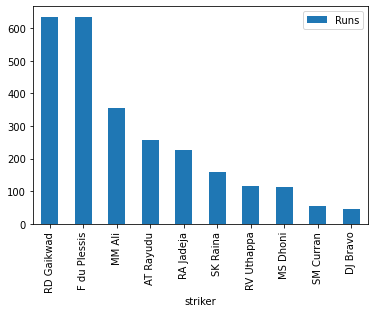

In [23]:
#top 10 run scorers in 2021 
runs1 = df_csk10.groupby(['batsman'])['batsman_run'].sum().reset_index()
runs1.columns=['striker','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='striker')

In [26]:
#Most wickets by against team
sub_data14 = df_csk10.loc[:, ['batsman', 'bowling_team', 'elimination_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['elimination_kind'] == 'bowled') | (sub_data14['elimination_kind'] == 'caught') | (sub_data14['elimination_kind'] == 'caught and bowled') | (sub_data14['elimination_kind'] == 'stumped') | (sub_data14['elimination_kind'] == 'lbw') | (sub_data14['elimination_kind'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowling_team']]
bowler = bowler_data['bowling_team'].value_counts().keys().tolist()
wickets = bowler_data['bowling_team'].value_counts().tolist()

<AxesSubplot:xlabel='bowling_team'>

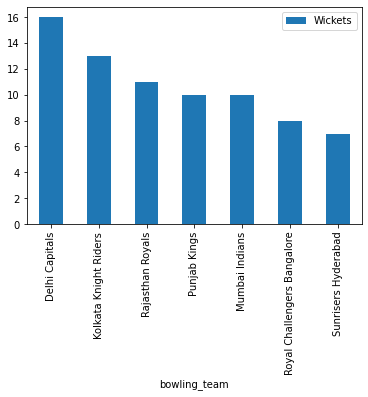

In [27]:
d1 = {'bowling_team':bowler,'Wickets':wickets}
df1 = pd.DataFrame(d1)
dfg=df1.head(10)
dfg.plot.bar(x='bowling_team')

<AxesSubplot:xlabel='bowling_team'>

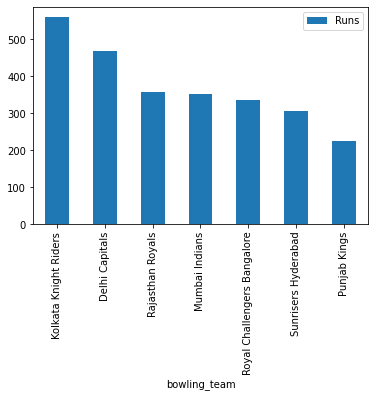

In [28]:
#top runs by csk  in 2020
runs1 = df_csk10.groupby(['bowling_team'])['batsman_run'].sum().reset_index()
runs1.columns=['bowling_team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='bowling_team')

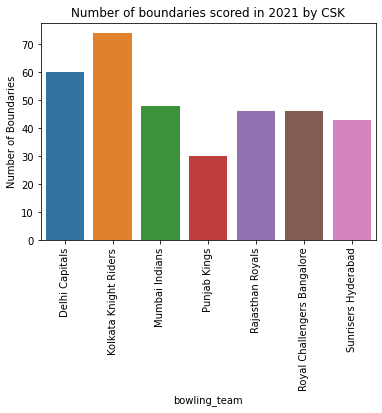

In [30]:
def barplot(x_axis, y_axis, plot_data, title, x_label, y_label):
    """Bar plot using seaborn library"""
    plot = sns.barplot(x=x_axis, y=y_axis, data=plot_data)
    plot.set(xlabel=x_label, ylabel=y_label)
    plot.set_title(title)
    plt.xticks(rotation=90)
    plt.show()
    #number of 4s and 6s scored boundaries scored in each season
boundaries_per_season = df_csk10[(df_csk10['batsman_run']==4) | (df_csk10['batsman_run']==6)].groupby(['bowling_team'])['batsman_run'].count().reset_index()
#barplot
barplot('bowling_team', 'batsman_run', boundaries_per_season, 'Number of boundaries scored in 2021 by CSK',
        'bowling_team', 'Number of Boundaries')

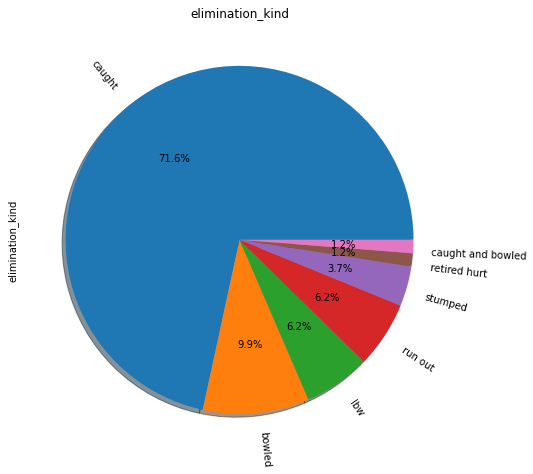

In [32]:
#batsman are out by wicket types-
df_csk10['elimination_kind'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(14,8),shadow=True,rotatelabels=True)
plt.title('elimination_kind')
plt.show()

# As a bowling team CSK in 2021

In [35]:
cskb=(dfk['bowling_team']=='Chennai Super Kings')
df_csk11=dfk[cskb]
df_csk11.head()

,match_name,inning,batting_team,bowling_team,ball,non_striker,batsman,bowler,extra_runs,batsman_run,...,player_out,elimination_kind,fielders_caught,umpires_1,umpires_2,player_of_match,winner,city,venue,dates
373,CSK vs DC 2021-04-10,2nd innings,Delhi Capitals,Chennai Super Kings,0.1,S Dhawan,PP Shaw,DL Chahar,0,0,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10
374,CSK vs DC 2021-04-10,2nd innings,Delhi Capitals,Chennai Super Kings,0.2,S Dhawan,PP Shaw,DL Chahar,0,4,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10
375,CSK vs DC 2021-04-10,2nd innings,Delhi Capitals,Chennai Super Kings,0.3,S Dhawan,PP Shaw,DL Chahar,0,1,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10
376,CSK vs DC 2021-04-10,2nd innings,Delhi Capitals,Chennai Super Kings,0.4,PP Shaw,S Dhawan,DL Chahar,0,4,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10
377,CSK vs DC 2021-04-10,2nd innings,Delhi Capitals,Chennai Super Kings,0.5,PP Shaw,S Dhawan,DL Chahar,0,0,...,NaN,NaN,NaN,AK Chaudhary,VK Sharma,S Dhawan,Delhi Capitals,Mumbai,"Wankhede Stadium, Mumbai",2021-04-10


<AxesSubplot:xlabel='striker'>

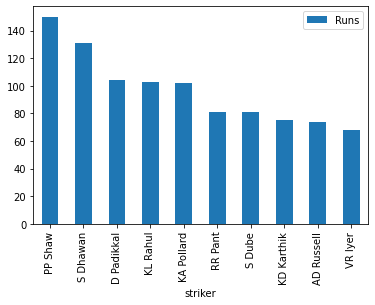

In [36]:
#top 10 run scorers against csk in 2021 
runs1 = df_csk11.groupby(['batsman'])['batsman_run'].sum().reset_index()
runs1.columns=['striker','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='striker')

<AxesSubplot:xlabel='batting_team'>

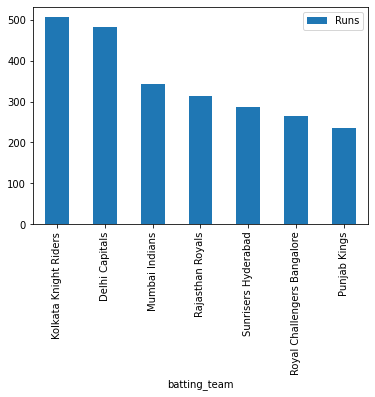

In [37]:
#top runs by teams against csk in 2020 
runs1 = df_csk11.groupby(['batting_team'])['batsman_run'].sum().reset_index()
runs1.columns=['batting_team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='batting_team')

<AxesSubplot:xlabel='bowler'>

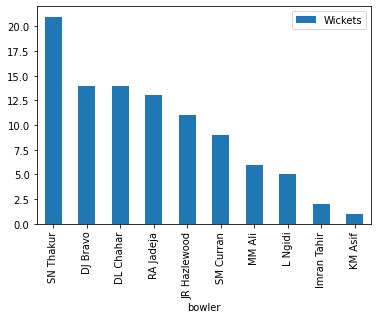

In [39]:
#Most wickets takers
sub_data14 = df_csk11.loc[:, ['batsman', 'bowler', 'elimination_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (sub_data14['elimination_kind'] == 'bowled') | (sub_data14['elimination_kind'] == 'caught') | (sub_data14['elimination_kind'] == 'caught and bowled') | (sub_data14['elimination_kind'] == 'stumped') | (sub_data14['elimination_kind'] == 'lbw') | (sub_data14['elimination_kind'] == 'hit wicket')
bowler_data = sub_data14[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().keys().tolist()
wickets = bowler_data['bowler'].value_counts().tolist()
d1 = {'bowler':bowler,'Wickets':wickets}
df1 = pd.DataFrame(d1)
dfg=df1.head(10)
dfg.plot.bar(x='bowler')

<AxesSubplot:xlabel='batting_team'>

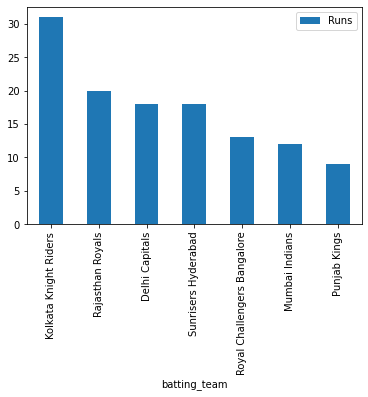

In [41]:
#most extras by csk
runs1 = df_csk11.groupby(['batting_team'])['extra_runs'].sum().reset_index()
runs1.columns=['batting_team','Runs']
y = runs1.sort_values(by='Runs',ascending=False ).head(10)
y.plot.bar(x='batting_team')

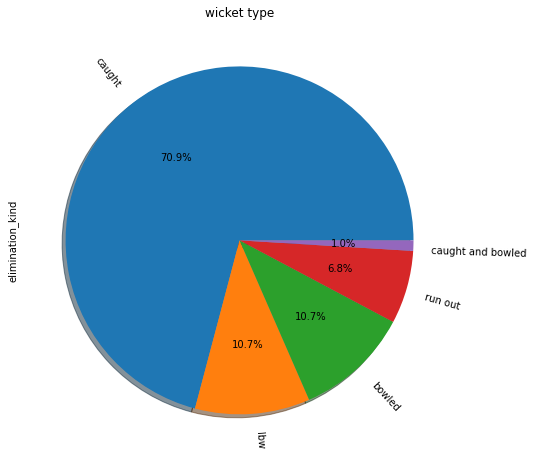

In [42]:
#Wickets by csk bowlers
df_csk11['elimination_kind'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(14,8),shadow=True,rotatelabels=True)
plt.title('wicket type')
plt.show()